# 1. Subir el archivo

In [1]:
from google.colab import files
uploaded = files.upload()


Saving dataset_ventas_sucursales.xlsx to dataset_ventas_sucursales.xlsx


# 2. Cargar los datos


In [2]:
import pandas as pd

# Leer el archivo
df = pd.read_excel("dataset_ventas_sucursales.xlsx")

# Revisar las primeras filas
df.head()


,Fecha,Sucursal,Producto,Unidades,Ventas,Mes,Día
0,2023-01-01,Santiago,P001,5,60000,2023-01,2023-01-01
1,2023-01-01,Santiago,P002,5,75000,2023-01,2023-01-01
2,2023-01-01,Santiago,P003,5,50000,2023-01,2023-01-01
3,2023-01-01,Santiago,P004,5,100000,2023-01,2023-01-01
4,2023-01-01,Valparaíso,P001,5,60000,2023-01,2023-01-01


# 3. Agregar columnas útiles

In [3]:
# Convertir fechas y agregar columnas auxiliares
df['Fecha'] = pd.to_datetime(df['Fecha'])
df['Mes'] = df['Fecha'].dt.to_period('M')
df['Día'] = df['Fecha'].dt.date


# 4. Resumen general del dataset

In [4]:
# Estadísticas descriptivas
df.describe()


,Fecha,Unidades,Ventas
count,5840,5840.000000,5.840000e+03
mean,2023-07-02 00:00:00,5.162500,7.388818e+04
min,2023-01-01 00:00:00,0.000000,0.000000e+00
25%,2023-04-02 00:00:00,3.000000,4.500000e+04
50%,2023-07-02 00:00:00,5.000000,6.000000e+04
75%,2023-10-01 00:00:00,6.000000,9.000000e+04
max,2023-12-31 00:00:00,54.000000,1.080000e+06
std,NaN,3.385107,5.431893e+04


# 5. Total de ventas por sucursal

In [5]:
ventas_sucursal = df.groupby('Sucursal')['Ventas'].sum().sort_values(ascending=False)
print("Ventas totales por sucursal:")
print(ventas_sucursal)


Ventas totales por sucursal:
Sucursal
Valparaíso     111125000
Concepción     108945000
Antofagasta    105983000
Santiago       105454000
Name: Ventas, dtype: int64


# 6. Promedio de ventas por producto



In [6]:
prom_ventas_producto = df.groupby('Producto')['Ventas'].mean().sort_values(ascending=False)
print("Promedio de ventas por producto:")
print(prom_ventas_producto)


Promedio de ventas por producto:
Producto
P004    105095.890411
P002     79243.150685
P001     60542.465753
P003     50671.232877
Name: Ventas, dtype: float64


# 7. Unidades vendidas por mes

In [7]:
unidades_mes = df.groupby('Mes')['Unidades'].sum()
print("Unidades vendidas por mes:")
print(unidades_mes)


Unidades vendidas por mes:
Mes
2023-01    2527
2023-02    2285
2023-03    2566
2023-04    2470
2023-05    2626
2023-06    2554
2023-07    2578
2023-08    2447
2023-09    2557
2023-10    2586
2023-11    2400
2023-12    2553
Freq: M, Name: Unidades, dtype: int64


# 8. Visualización rápida con matplotlib

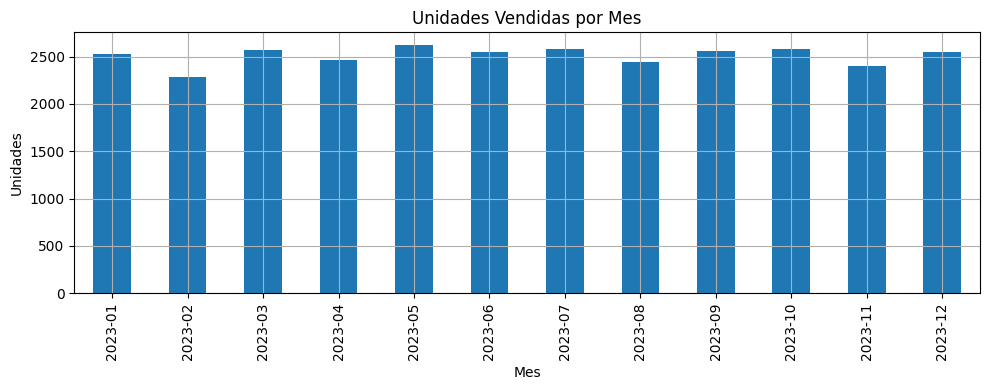

In [21]:
import matplotlib.pyplot as plt

# Unidades por mes
unidades_mes.plot(kind='bar', figsize=(10, 4), title='Unidades Vendidas por Mes')
plt.xlabel('Mes')
plt.ylabel('Unidades')
plt.grid(True)
plt.tight_layout()
plt.show()

Código completo para detección de anomalías por métodos estadísticos clásicos en Google Colab, aplicando tanto Z-Score como IQR sobre las ventas diarias agregadas por sucursal y producto:

# Paso 1: Agrupar ventas por día y sucursal

In [10]:
# Agrupar por día y sucursal para análisis temporal
ventas_diarias = df.groupby(['Día', 'Sucursal'])['Ventas'].sum().reset_index()


# Paso 2: Detectar anomalías usando Z-Score

In [11]:
from scipy.stats import zscore

# Calcular z-score por sucursal
ventas_diarias['Zscore'] = ventas_diarias.groupby('Sucursal')['Ventas'].transform(zscore)

# Definir umbral (|z| > 3 suele indicar outliers)
umbral_z = 3
anomalías_z = ventas_diarias[ventas_diarias['Zscore'].abs() > umbral_z]

print(f"Anomalías detectadas con Z-score (|z| > {umbral_z}):")
print(anomalías_z)


Anomalías detectadas con Z-score (|z| > 3):
             Día     Sucursal   Ventas    Zscore
91    2023-01-23   Valparaíso  1000000  5.464551
97    2023-01-25   Concepción   622000  3.311960
128   2023-02-02  Antofagasta   757000  5.133343
142   2023-02-05     Santiago   590000  3.760856
167   2023-02-11   Valparaíso   921000  4.843890
222   2023-02-25     Santiago   543000  3.173778
248   2023-03-04  Antofagasta   925000  6.981469
257   2023-03-06   Concepción   714000  4.253787
368   2023-04-03  Antofagasta   790000  5.496367
451   2023-04-23   Valparaíso   958000  5.134579
492   2023-05-04  Antofagasta   612000  3.538234
547   2023-05-17   Valparaíso  1317000  7.955052
597   2023-05-30   Concepción   708000  4.192363
617   2023-06-04   Concepción   878000  5.932695
737   2023-07-04   Concepción   636000  3.455282
792   2023-07-18  Antofagasta   792000  5.518369
798   2023-07-19     Santiago   775000  6.071694
811   2023-07-22   Valparaíso   786000  3.783267
904   2023-08-15  Antofag

# Paso 3: Detectar anomalías usando IQR (Rango Intercuartílico)

In [12]:
# Función para detectar outliers por sucursal con IQR
def detectar_outliers_iqr(df_in, columna):
    outliers = pd.DataFrame()
    for sucursal in df_in['Sucursal'].unique():
        grupo = df_in[df_in['Sucursal'] == sucursal]
        Q1 = grupo[columna].quantile(0.25)
        Q3 = grupo[columna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inf = Q1 - 1.5 * IQR
        limite_sup = Q3 + 1.5 * IQR
        grupo_outliers = grupo[(grupo[columna] < limite_inf) | (grupo[columna] > limite_sup)]
        outliers = pd.concat([outliers, grupo_outliers])
    return outliers

# Aplicar función
anomalías_iqr = detectar_outliers_iqr(ventas_diarias, 'Ventas')

print("Anomalías detectadas con IQR:")
print(anomalías_iqr)


Anomalías detectadas con IQR:
             Día     Sucursal   Ventas    Zscore
128   2023-02-02  Antofagasta   757000  5.133343
248   2023-03-04  Antofagasta   925000  6.981469
368   2023-04-03  Antofagasta   790000  5.496367
492   2023-05-04  Antofagasta   612000  3.538234
584   2023-05-27  Antofagasta   508000  2.394155
792   2023-07-18  Antofagasta   792000  5.518369
904   2023-08-15  Antofagasta   722000  4.748316
1112  2023-10-06  Antofagasta    67000 -2.457176
1232  2023-11-05  Antofagasta    87000 -2.237161
97    2023-01-25   Concepción   622000  3.311960
257   2023-03-06   Concepción   714000  4.253787
317   2023-03-21   Concepción   559000  2.667013
481   2023-05-01   Concepción   473000  1.786610
565   2023-05-22   Concepción   528000  2.349659
597   2023-05-30   Concepción   708000  4.192363
617   2023-06-04   Concepción   878000  5.932695
689   2023-06-22   Concepción   457000  1.622814
737   2023-07-04   Concepción   636000  3.455282
741   2023-07-05   Concepción   486000 

# Paso 4: Visualizar anomalías para una sucursal

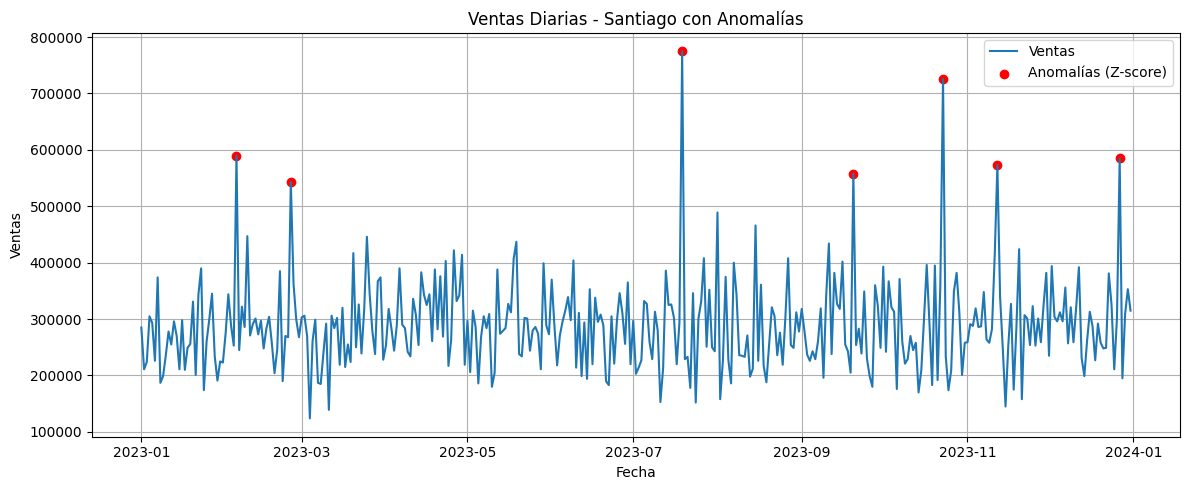

In [13]:
# Visualizar para 'Santiago'
import matplotlib.pyplot as plt

df_santiago = ventas_diarias[ventas_diarias['Sucursal'] == 'Santiago']
anomalías_santiago = anomalías_z[anomalías_z['Sucursal'] == 'Santiago']

plt.figure(figsize=(12, 5))
plt.plot(df_santiago['Día'], df_santiago['Ventas'], label='Ventas')
plt.scatter(anomalías_santiago['Día'], anomalías_santiago['Ventas'], color='red', label='Anomalías (Z-score)')
plt.title('Ventas Diarias - Santiago con Anomalías')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Detección de anomalías en ventas diarias con Isolation Forest
La detección de anomalías busca identificar patrones atípicos en los datos que difieren significativamente del comportamiento normal
iic.uam.es
. En el contexto de ventas diarias, esto significa encontrar días con ventas inusualmente altas o bajas. Un pico repentino (venta muy alta) o una caída abrupta (venta muy baja) en las ventas pueden indicar un comportamiento anómalo que merece atención
medium.com
. Para este fin utilizaremos Isolation Forest, un algoritmo no supervisado que aísla cada observación usando árboles de decisión aleatorios para detectar outliers
iic.uam.es
. En esencia, cuantas menos particiones necesite el modelo para aislar un punto de datos, más anómalo se considera, ya que ese punto está claramente separado del resto
iic.uam.es
. A continuación, implementaremos paso a paso el análisis en Python (pensado para ejecutarse en Google Colab), incluyendo preparación de datos, posible normalización, entrenamiento del modelo, clasificación de resultados, visualización de anomalías y exportación opcional a Excel.
# 1. Preparación de los datos: Agrupar ventas por fecha y sucursal
En primer lugar, cargamos el dataset desde el archivo Excel y lo convertimos en un DataFrame de pandas. Supondremos que el archivo tiene columnas Fecha, Sucursal, Producto, Unidades, Ventas. Luego agregaremos (sumaremos) las ventas por cada combinación de fecha y sucursal para obtener la venta total diaria por sucursal. Esto nos dará una serie temporal de ventas diarias para cada sucursal, que es el formato adecuado para detectar anomalías día a día en cada tienda.


In [15]:
import pandas as pd

# Cargar datos de ventas desde un archivo Excel
# Asegurarse de que la columna 'Fecha' se interprete como tipo fecha (datetime)
df = pd.read_excel('dataset_ventas_sucursales.xlsx', parse_dates=['Fecha'])

# Ver las primeras filas del DataFrame original
print("Datos originales - primeras filas:")
print(df.head(), "\n")

# Agrupar las ventas por 'Fecha' y 'Sucursal', sumando la columna 'Ventas'
ventas_diarias = df.groupby(['Fecha', 'Sucursal'])['Ventas'].sum().reset_index()

# Ver las primeras filas después de la agregación
print("Datos agregados por fecha y sucursal - primeras filas:")
print(ventas_diarias.head())


Datos originales - primeras filas:
       Fecha    Sucursal Producto  Unidades  Ventas      Mes        Día
0 2023-01-01    Santiago     P001         5   60000  2023-01 2023-01-01
1 2023-01-01    Santiago     P002         5   75000  2023-01 2023-01-01
2 2023-01-01    Santiago     P003         5   50000  2023-01 2023-01-01
3 2023-01-01    Santiago     P004         5  100000  2023-01 2023-01-01
4 2023-01-01  Valparaíso     P001         5   60000  2023-01 2023-01-01 

Datos agregados por fecha y sucursal - primeras filas:
       Fecha     Sucursal  Ventas
0 2023-01-01  Antofagasta  331000
1 2023-01-01   Concepción  173000
2 2023-01-01     Santiago  285000
3 2023-01-01   Valparaíso  220000
4 2023-01-02  Antofagasta  265000


Explicación: Aquí usamos pandas.groupby para combinar las filas que comparten la misma Fecha y Sucursal, sumando sus ventas. El resultado ventas_diarias tiene columnas: Fecha, Sucursal y Ventas (totales diarios por sucursal). Revisamos con head() para confirmar que los datos se hayan agrupado correctamente.

# 2. Normalización de los datos (si es necesaria)
En muchos casos, es conveniente normalizar o escalar los datos antes del modelado, especialmente si trabajamos con algoritmos sensibles a la escala. Sin embargo, Isolation Forest es un modelo basado en árboles, por lo que no requiere normalización de las características para funcionar correctamente. Aun así, la normalización no perjudica y puede ser útil si deseamos que los valores tengan media 0 y desviación estándar 1. A continuación, mostramos cómo

In [16]:
from sklearn.preprocessing import StandardScaler

# Normalización (opcional): estandarizar la columna 'Ventas'
scaler = StandardScaler()
ventas_diarias['Ventas_norm'] = scaler.fit_transform(ventas_diarias[['Ventas']])

# Ver las primeras filas con la columna normalizada
print("Ventas normalizadas - primeras filas:")
print(ventas_diarias[['Fecha', 'Sucursal', 'Ventas', 'Ventas_norm']].head())


Ventas normalizadas - primeras filas:
       Fecha     Sucursal  Ventas  Ventas_norm
0 2023-01-01  Antofagasta  331000     0.351955
1 2023-01-01   Concepción  173000    -1.216824
2 2023-01-01     Santiago  285000    -0.104778
3 2023-01-01   Valparaíso  220000    -0.750162
4 2023-01-02  Antofagasta  265000    -0.303357


Nota: Hemos creado una nueva columna Ventas_norm que contiene las ventas diarias escaladas (normalización tipo Z-score). Isolation Forest no es sensible a la escala de la variable de entrada (porque basa las divisiones en rangos relativos), así que podríamos usar directamente la columna original Ventas sin normalizar. En este ejemplo incluimos la normalización solo para mostrar cómo realizarla si se necesitara.

# 3. Entrenamiento del modelo IsolationForest
Ahora entrenaremos el modelo de aislamiento (Isolation Forest) para detectar outliers en las ventas diarias. Usaremos la implementación de sklearn.ensemble.IsolationForest con parámetros estándar. Dado que cada sucursal puede tener un rango de ventas distinto, entrenaremos un modelo por cada sucursal para que las anomalías se identifiquen respecto al patrón propio de cada tienda (esto evita que una sucursal con ventas normalmente más altas influya en otra). Isolation Forest es un algoritmo no supervisado muy utilizado para detección de anomalías
iic.uam.es
. Internamente, construye múltiples árboles de decisión que particionan aleatoriamente los datos; las observaciones que se aíslan con pocas divisiones obtienen una puntuación indicando alta rareza (anomalía)
iic.uam.es
. No necesitamos proporcionar etiquetas de entrenamiento, ya que el modelo aprende la estructura de los datos normales y produce predicciones de anomalía para cada ejemplo.


In [17]:
from sklearn.ensemble import IsolationForest

# Inicializar columna de clasificación con valor 'Normal' por defecto
ventas_diarias['Clasificacion'] = 'Normal'

# Entrenar un IsolationForest por cada sucursal
for sucursal in ventas_diarias['Sucursal'].unique():
    # Filtrar los datos de una sucursal
    datos_sucursal = ventas_diarias[ventas_diarias['Sucursal'] == sucursal]
    X = datos_sucursal[['Ventas']]  # usamos la columna original de ventas (no normalizada)
    # Si se desea usar la columna normalizada en su lugar:
    # X = datos_sucursal[['Ventas_norm']]

    # Instanciar el modelo IsolationForest (parámetros estándar)
    model = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
    model.fit(X)  # entrenar el modelo con los datos de ventas de esta sucursal

    # Predecir anomalías en los mismos datos de entrenamiento
    preds = model.predict(X)  # devuelve 1 para normal y -1 para anomalía

    # Marcar la clasificación en el DataFrame: 'Anomalía' donde predicción = -1
    ventas_diarias.loc[datos_sucursal.index[preds == -1], 'Clasificacion'] = 'Anomalía'

# Ver cuántas anomalías se detectaron en total
total_anomalias = (ventas_diarias['Clasificacion'] == 'Anomalía').sum()
print(f"Total de registros analizados: {len(ventas_diarias)}")
print(f"Total de anomalías detectadas: {total_anomalias}")


Total de registros analizados: 1460
Total de anomalías detectadas: 207


En el código anterior, iteramos por cada sucursal distinta y entrenamos un IsolationForest solo con los datos de esa sucursal. Usamos contamination='auto' para que el modelo determine automáticamente el umbral de anomalía según el papel original del algoritmo (equivale aproximadamente a asumir un 0.5% de anomalías, aunque en general Isolation Forest ajusta el threshold internamente). Tras el entrenamiento, utilizamos model.predict(X) para obtener la clasificación de cada punto: el valor -1 indica una anomalía y 1 indica un valor normal. Asignamos la etiqueta "Anomalía" o "Normal" en la columna Clasificacion según corresponda a cada fila. Al final, imprimimos el total de filas analizadas y cuántas resultaron marcadas como anómalas.

# 4. Clasificación de registros como normales o anomalías
Después de ejecutar el paso anterior, nuestro DataFrame ventas_diarias incluye la columna Clasificacion que indica para cada fecha y sucursal si la venta diaria es normal o una anomalía. Podemos inspeccionar algunas de las filas detectadas como anómalas (por ejemplo, las primeras 5 anomalías encontradas) para verificar cuáles días y sucursales presentaron ventas atípicas:

In [18]:
# Mostrar algunas de las anomalías detectadas (primeras 5 filas anómalas)
anomalias_detectadas = ventas_diarias[ventas_diarias['Clasificacion'] == 'Anomalía']
print("Ejemplos de registros anómalos detectados:")
print(anomalias_detectadas.head())


Ejemplos de registros anómalos detectados:
        Fecha     Sucursal  Ventas  Ventas_norm Clasificacion
1  2023-01-01   Concepción  173000    -1.216824      Anomalía
16 2023-01-05  Antofagasta  161000    -1.335971      Anomalía
26 2023-01-07     Santiago  374000     0.778901      Anomalía
39 2023-01-10   Valparaíso  427000     1.305137      Anomalía
40 2023-01-11  Antofagasta  437000     1.404427      Anomalía


Al filtrar ventas_diarias por Clasificacion == 'Anomalía' obtenemos solamente las filas consideradas outliers por el modelo. Estas corresponderán a días con ventas inusualmente altas o bajas para su sucursal. Es importante analizar estos casos: podrían deberse a eventos reales (ofertas especiales, rotura de stock, etc.) o a errores en los datos. Si necesitamos ajustar la sensibilidad, podríamos modificar el parámetro contamination de IsolationForest (por ejemplo, fijándolo a un valor específico como 0.05 para suponer un 5% de outliers esperados) para controlar cuántos puntos son etiquetados como anómalos.

# 5. Visualización de resultados con matplotlib
Para entender mejor las anomalías en el contexto temporal, vamos a graficar las series de tiempo de ventas diarias para cada sucursal y marcar en el gráfico los puntos anómalos identificados. Esto nos permitirá ver, por ejemplo, si las anomalías son picos aislados o caídas pronunciadas. Usaremos matplotlib para generar una gráfica por sucursal, mostrando la venta diaria como una línea y destacando las anomalías con un marcador rojo.
python
Copiar
Editar


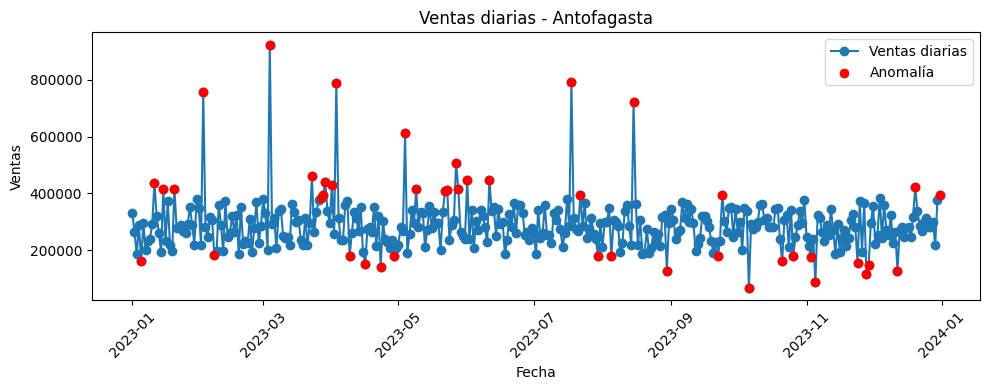

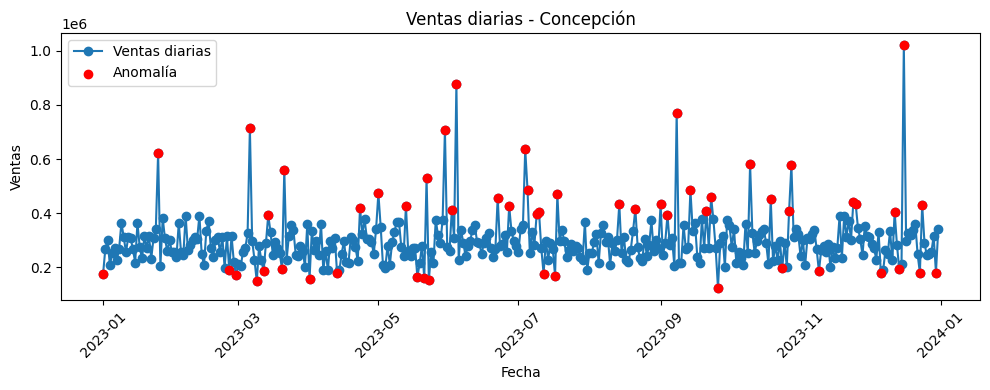

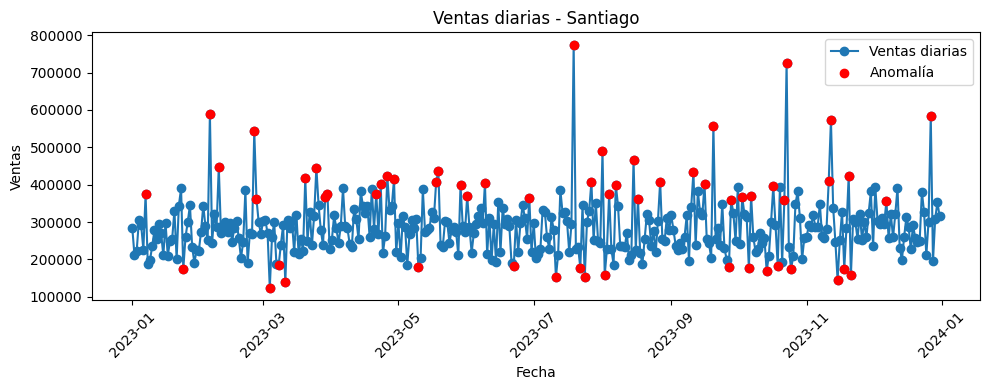

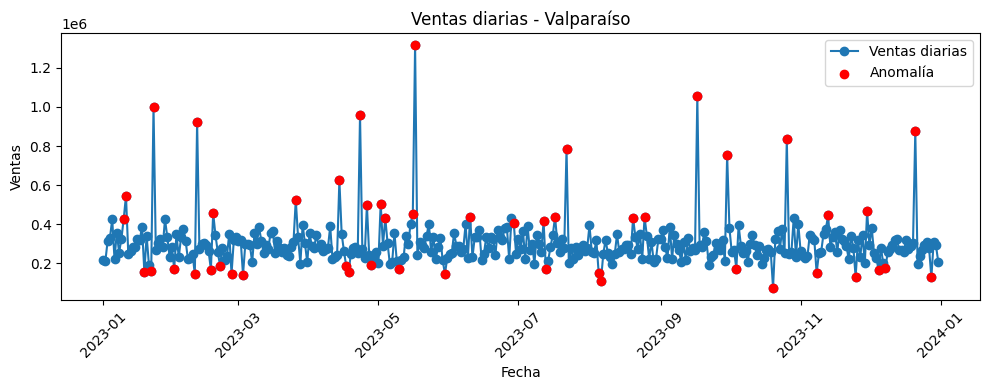

In [19]:
import matplotlib.pyplot as plt

# Asegurarse de que los datos estén ordenados cronológicamente por fecha
ventas_diarias = ventas_diarias.sort_values(['Sucursal', 'Fecha'])

# Graficar la serie temporal de cada sucursal con anomalías marcadas
sucursales = ventas_diarias['Sucursal'].unique()
for sucursal in sucursales:
    datos_sucursal = ventas_diarias[ventas_diarias['Sucursal'] == sucursal]
    fechas = datos_sucursal['Fecha']
    ventas = datos_sucursal['Ventas']
    clasif = datos_sucursal['Clasificacion']

    plt.figure(figsize=(10, 4))
    plt.plot(fechas, ventas, label='Ventas diarias', marker='o')
    # Marcar anomalías con puntos rojos
    anomalías = datos_sucursal[clasif == 'Anomalía']
    plt.scatter(anomalías['Fecha'], anomalías['Ventas'], color='red', label='Anomalía', zorder=5)

    plt.title(f"Ventas diarias - {sucursal}")
    plt.xlabel('Fecha')
    plt.ylabel('Ventas')
    plt.xticks(rotation=45)  # rotar las etiquetas de fecha si es necesario
    plt.legend()
    plt.tight_layout()
    plt.show()


Cada iteración del loop crea una figura para una sucursal. La línea azul (con marcador circular) representa las ventas diarias. Sobre la misma gráfica, usamos plt.scatter para colocar puntos rojos en los días que fueron clasificados como anomalías. De esta forma, es fácil visualizar qué días se consideran inusuales. Al rotar las etiquetas del eje x, nos aseguramos de que las fechas se vean claramente (especialmente si hay muchas). Tras ejecutar este código en Colab, deberían aparecer las gráficas debajo de la celda, una por sucursal. Inspeccione estos gráficos para confirmar que las anomalías marcadas corresponden efectivamente a ventas extraordinariamente altas o bajas en comparación con la tendencia general de cada sucursal.

# 6. Exportación de anomalías detectadas a Excel
Como paso final y opcional, podemos exportar la lista de anomalías detectadas a un archivo Excel para compartir o analizar en otra herramienta (por ejemplo, Excel mismo). Esto permitirá a otros revisar los días y sucursales anómalos con sus valores de venta. Utilizaremos pandas.DataFrame.to_excel para crear el archivo. Nota: En Google Colab, es posible que necesite instalar la librería openpyxl (usada por pandas para escribir Excel) antes de usar to_excel. Puede hacerlo ejecutando !pip install openpyxl en una celda.

In [20]:
# Filtrar solo las filas anómalas
anomalias = ventas_diarias[ventas_diarias['Clasificacion'] == 'Anomalía']

# Exportar las anomalías a un archivo Excel
anomalias.to_excel('anomalías_detectadas.xlsx', index=False)
print(f"Anomalías guardadas en 'anomalías_detectadas.xlsx' (total {len(anomalias)} filas).")


Anomalías guardadas en 'anomalías_detectadas.xlsx' (total 207 filas).


Este código crea un archivo anomalías_detectadas.xlsx en el directorio de trabajo, que contiene únicamente las filas marcadas como "Anomalía". Cada registro incluye la Fecha, Sucursal, Ventas (y Ventas_norm si no la removió) y la clasificación. El index=False evita guardar el índice numérico de pandas en el archivo. Una vez generado el archivo, en Colab puede descargarlo haciendo clic en el ícono de archivos (barra lateral) y luego en Download. Con estos pasos, hemos implementado un análisis completo de detección de anomalías en Python utilizando Isolation Forest. Empleamos datos agregados por fecha y sucursal, normalización opcional, entrenamiento del modelo por sucursal, identificación de ventas diarias anormales tanto por exceso como por defecto, visualización de resultados y exportación de las anomalías para un análisis posterior. Ahora se pueden interpretar las causas de dichas anomalías o refinar el modelo según las necesidades del negocio.

Referencias:

Instituto de Ingeniería del Conocimiento (IIC). Detección de anomalías en series temporales – Definición y técnicas de detección de outliers
iic.uam.es

.
Adithya Krishnan. Anomaly Detection with Isolation Forest & Visualization – Concepto de picos y caídas como anomalías
medium.com

.
IIC. Isolation Forest para detectar anomalías – Explicación del algoritmo Isolation Forest (árboles que aíslan muestras)
iic.uam.es
iic.uam.es

.
KNIME Forum. Outlier and Normalization – Nota sobre la no necesidad de normalizar datos para modelos basados en árboles.